#**VISUALIZING MIGRATION IN CANADA**

In [ ]:
!pip install geoplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 37.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np

import geopandas as gpd
import matplotlib.pyplot as plt

from google.colab import files
import zipfile
import io

In [ ]:
# Note: Statistics Canada's definition of "recent immigrants" is those that migrated to Canada
# within the last 5 years of a census year (e.g., 2016-2021, 2011-2016, 2006-2011, etc.)

In [ ]:
# Import csv files for time-series analysis
NPR_ProvTerr = pd.read_csv("Non-Permanent Migration.csv") # Total Number of Non-Permanent Residents by Province and Territory
IntMig = pd.read_csv("Estimates of the components of international migration, quarterly.csv")# Quarterly International Migration by Province and Territory
Top10Mig=pd.read_csv("Migration Timeline of Top 10 Countries from 2020.csv") # Census-by-census immigration data from top 10 countries of origin in 2020

In [ ]:
# Import csv files for categorical data analysis, 2021 Census
GenderMig=pd.read_csv("Migration Gender Breakdown.csv", na_values=['#DIV/0!']) # % of Recent Migrants that identify as woman by country of origin and province and territory
Top5=pd.read_csv("Top 5 by Province & Territory.csv") # Each province's top 5 countries of origin, recent immigrants
Age=pd.read_csv("Migration Age Analysis.csv") # Age breakdown of immigrant population vs. general population, by province and territory

In [52]:
# Import csv files for scatter plot analysis, Top 25 Census Metropolitan Areas (2021 Census) by population
RecImm_CMA=pd.read_csv("Recent Immigrants CMA.csv") # Recent immigrants by census metropolitan areas
NPR_CMA=pd.read_csv("Non-Permanent Residents CMA.csv") # Toal non-permanent residents by census metropolitan areas
GrowthCMA=pd.read_csv("CMA vs. Immigrant Growth Rate.csv") # % Growth rate of CMAs and immigrant population in each CMA

In [53]:
# Note: There will be 26 entries for the scatter plot analysis (the Ottawa-Gatineau CMA is split between Ontario and Quebec)

## **TIME-SERIES ANALYSIS**

###**Non-Permanent Residence by Province**


In [ ]:
NPR_ProvTerr.head()

,QUARTER,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
0,Q1 2001,286957,1740,397,4413,2546,58557,131521,5176,4425,21257,56571,100,236,18
1,Q2 2001,304225,1692,407,4572,2713,60387,142432,5372,4545,22759,58973,98,252,23
2,Q3 2001,323179,1812,411,4629,2684,61589,155717,5597,4751,24510,61039,146,262,32
3,Q4 2001,352727,1714,442,5322,3058,66367,172239,5982,4908,26286,65961,125,298,25
4,Q1 2002,334393,1687,409,5409,2985,63316,157626,5832,4858,25679,66200,80,284,28


In [ ]:
NPR_ProvTerr.tail()

,QUARTER,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
90,Q3 2023,2226999,13870,10326,47080,28535,425714,1034795,64611,32346,162281,405164,1547,596,134
91,Q4 2023,2545432,15568,11755,53153,34533,479789,1186651,71708,37929,192436,459259,1753,693,205
92,Q1 2024,2729771,16063,11688,54415,35931,512816,1276477,78182,41241,215517,484651,1819,785,186
93,Q2 2024,2884254,16766,11400,55273,36175,551300,1331298,83935,42932,239447,512787,1853,884,204
94,Q3 2024,3002090,17843,11323,55825,36591,588263,1377531,84614,43481,253541,529960,1935,945,238


In [ ]:
fig = px.area(NPR_ProvTerr,
             x='QUARTER',
             y=['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
                'Newfoundland and Labrador', 'Northwest Territories', 'Nova Scotia',
                'Nunavut', 'Ontario', 'Prince Edward Island', 'Quebec',
                'Saskatchewan', 'Yukon'])
fig.update_layout(
    title="Total Number of Non-Permanent Residents in Canada",
    xaxis_title="Quarter",
    yaxis_title="Non-Permanent Residents",
    legend_title="Province or Territory",
)

fig.add_vrect(
    x0="Q2 2020",
    x1="Q3 2021",
    label=dict(
        text="COVID-19 First 3 Waves",
        textposition="top center",
        font=dict(size=20, family="Times New Roman"),
    ),
    fillcolor="green",
    opacity=0.25,
    line_width=0,
)

fig.show()

###**International Migration by Province**

In [ ]:
IntMig.head()

,QUARTER,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
0,Q1 2001,58485,99,46,460,203,8097,34801,1095,402,3830,9428,9,15,0
1,Q2 2001,70048,100,18,411,210,10733,41662,1235,384,4439,10807,18,26,5
2,Q3 2001,69951,89,29,495,220,10058,42152,1164,556,4591,10529,26,36,6
3,Q4 2001,52154,104,41,332,165,8716,30039,1098,361,3546,7720,12,18,2
4,Q1 2002,61589,106,31,364,170,9762,36136,1036,451,3929,9573,5,20,6


In [ ]:
IntMig.tail()

,QUARTER,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
90,Q3 2023,107988,1055,826,2615,2883,16516,47161,5032,6025,11869,13754,167,69,16
91,Q4 2023,100406,1279,824,2787,3210,8612,43892,5142,5134,13981,15273,195,64,13
92,Q1 2024,121733,1407,1330,3999,3997,13370,52776,5684,5610,15380,17758,297,116,9
93,Q2 2024,134138,1612,1169,4335,4898,16953,53828,7745,7414,19024,16789,236,117,18
94,Q3 2024,124239,1601,977,3645,4124,16621,51292,6795,6039,16917,15829,276,106,17


In [ ]:
fig2 = px.area(IntMig,
               x='QUARTER',
               y=['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
                  'Newfoundland and Labrador', 'Northwest Territories', 'Nova Scotia',
                  'Nunavut', 'Ontario', 'Prince Edward Island', 'Quebec',
                  'Saskatchewan', 'Yukon'])

fig2.update_layout(
    title="Quarterly Immigration",
    xaxis_title="Quarter",
    yaxis_title="Net International Immigration",
    legend_title="Province or Territory"
)

fig2.add_vrect(
    x0="Q2 2020",
    x1="Q3 2021",
    label=dict(
        text="COVID-19 First 3 Waves",
        textposition="top center",
        font=dict(size=20, family="Times New Roman"),
    ),
    fillcolor="green",
    opacity=0.25,
    line_width=0,
)

fig2.show()

###**Breakdown of Immigrants' Countries of Origin**

In [ ]:
Top10Mig.head()

,YEAR,RECENT IMMIGRANTS,COUNTRY
0,2001,91645,India
1,2001,124895,"China, People’s Republic of"
2,2001,55470,Philippines
3,2001,29745,United States of America
4,2001,4545,Nigeria


In [ ]:
Top10Mig.tail()

,YEAR,RECENT IMMIGRANTS,COUNTRY
45,2021,36255,Pakistan
46,2021,63130,Syria
47,2021,27175,France
48,2021,25650,Iran
49,2021,19895,Brazil


In [ ]:
fig3 = px.line(Top10Mig, x='YEAR', y='RECENT IMMIGRANTS', color='COUNTRY', width=800, height=600)

fig3.update_layout(
    title="Recent Immigrants by Country",
    xaxis_title="Census Year",
    yaxis_title="Number of Recent Immigrants",
    legend_title="Country of Origin",
)

fig3.update_xaxes(tickvals=[2001, 2006, 2011, 2016, 2021],
                 ticktext=["2001", "2006", "2011", "2016", "2021"])
fig3.show()

## **CATEGORICAL DATA ANALYSIS**

###**Gender Analysis**

In [ ]:
GenderMig.head()

,COUNTRY OF ORIGIN,"Total, Recent Immigrants-Canada","Total, Recent Immigrants (Women)-Canada","Total, Recent Immigrants-Newfoundland and Labrador","Total, Recent Immigrants (Women)-Newfoundland and Labrador","Total, Recent Immigrants-Prince Edward Island","Total, Recent Immigrants (Women)-Prince Edward Island","Total, Recent Immigrants-Nova Scotia","Total, Recent Immigrants (Women)-Nova Scotia","Total, Recent Immigrants-New Brunswick",...,% Women-New Brunswick,% Women-Quebec,% Women-Ontario,% Women-Manitoba,% Women-Saskatchewan,% Women-Alberta,% Women-British Columbia,% Women-Yukon,% Women-Northwest Territories,% Women-Nunavut
0,Brazil,19895,10560,25,20,50,20,265,125,160,...,0.468750,#VALUE!,0.530086,0.484321,0.441176,0.593407,0.525341,NaN,NaN,NaN
1,Colombia,11455,6365,20,0,35,25,45,20,30,...,0.333333,0.8990291262,0.572770,0.517241,0.555556,0.591603,0.539535,NaN,NaN,NaN
2,Haiti,10550,5400,0,0,0,0,0,0,75,...,0.533333,1.023282887,0.545161,0.400000,NaN,0.386364,0.428571,NaN,NaN,NaN
3,Jamaica,15155,7420,145,80,110,60,325,160,205,...,0.585366,0.01046511628,0.478435,0.471264,0.473214,0.537559,0.487562,0.666667,0.75,0.666667
4,Mexico,17150,8745,20,10,30,15,85,25,200,...,0.600000,5.953488372,0.527539,0.507576,0.446429,0.486194,0.523810,0.500000,1.00,NaN


In [ ]:
GenderMig.tail()

,COUNTRY OF ORIGIN,"Total, Recent Immigrants-Canada","Total, Recent Immigrants (Women)-Canada","Total, Recent Immigrants-Newfoundland and Labrador","Total, Recent Immigrants (Women)-Newfoundland and Labrador","Total, Recent Immigrants-Prince Edward Island","Total, Recent Immigrants (Women)-Prince Edward Island","Total, Recent Immigrants-Nova Scotia","Total, Recent Immigrants (Women)-Nova Scotia","Total, Recent Immigrants-New Brunswick",...,% Women-New Brunswick,% Women-Quebec,% Women-Ontario,% Women-Manitoba,% Women-Saskatchewan,% Women-Alberta,% Women-British Columbia,% Women-Yukon,% Women-Northwest Territories,% Women-Nunavut
50,United Arab Emirates,8405,4085,35,25,55,35,110,75,245,...,0.571429,0.5875,0.474576,0.457143,0.538462,0.456522,0.516129,NaN,NaN,NaN
51,Viet Nam,14725,9125,35,20,470,230,205,100,315,...,0.492063,1.035897436,0.633721,0.577586,0.485549,0.670455,0.650264,NaN,0.0,NaN
52,Other places of birth in Asia,30410,17375,105,65,115,65,410,220,240,...,0.583333,1.25617284,0.547069,0.493023,0.527273,0.604043,0.606597,1.0,0.0,NaN
53,Australia,6535,2685,10,10,20,10,75,15,60,...,0.833333,0.02802359882,0.395062,0.476190,0.526316,0.457447,0.400915,0.8,NaN,NaN
54,Other places of birth,2625,1135,0,0,0,0,40,10,0,...,NaN,0.2033898305,0.468085,0.391304,0.400000,0.440000,0.456897,0.0,NaN,NaN


In [ ]:
# Plot by province and territory, dash line represents % women in general population
fig4_1=px.bar(GenderMig, x='COUNTRY OF ORIGIN', y='% Women-Canada')
fig4_1.add_hline(y=0.5072921, annotation_text="% Women in Canada", line_dash="dash")
fig4_1.update_layout(
    title="Gendered Analysis of International Migration to Canada",
    xaxis_title="Country of Origin",
    yaxis_title="% Women (0-1)"
)
fig4_1.show()

fig4_2=px.bar(GenderMig, x='COUNTRY OF ORIGIN', y='% Women-Alberta')
fig4_2.add_hline(y=0.5007935, annotation_text="% Women in Alberta", line_dash="dash")
fig4_2.update_layout(
    title="Gendered Analysis of International Migration to Alberta",
    xaxis_title="Country of Origin",
    yaxis_title="% Women (0-1)"
)
fig4_2.show()

fig4_3=px.bar(GenderMig, x='COUNTRY OF ORIGIN', y='% Women-British Columbia')
fig4_3.add_hline(y=0.5085835, annotation_text="% Women in British Columbia", line_dash="dash")
fig4_3.update_layout(
    title="Gendered Analysis of International Migration to British Columbia",
    xaxis_title="Country of Origin",
    yaxis_title="% Women (0-1)"
)
fig4_3.show()

fig4_4=px.bar(GenderMig, x='COUNTRY OF ORIGIN', y='% Women-Manitoba')
fig4_4.add_hline(y=0.5034162, annotation_text="% Women in Manitoba", line_dash="dash")
fig4_4.update_layout(
    title="Gendered Analysis of International Migration to Manitoba",
    xaxis_title="Country of Origin",
    yaxis_title="% Women (0-1)"
)
fig4_4.show()

fig4_5=px.bar(GenderMig, x='COUNTRY OF ORIGIN', y='% Women-New Brunswick')
fig4_5.add_hline(y=0.5081871, annotation_text="% Women in New Brunswick", line_dash="dash")
fig4_5.update_layout(
    title="Gendered Analysis of International Migration to New Brunswick",
    xaxis_title="Country of Origin",
    yaxis_title="% Women (0-1)"
)
fig4_5.show()

fig4_6=px.bar(GenderMig, x='COUNTRY OF ORIGIN', y='% Women-Newfoundland and Labrador')
fig4_6.add_hline(y=0.5101851, annotation_text="% Women in Newfoundland and Labrador", line_dash="dash")
fig4_6.update_layout(
    title="Gendered Analysis of International Migration to Newfoundland and Labrador",
    xaxis_title="Country of Origin",
    yaxis_title="% Women (0-1)"
)
fig4_6.show()

fig4_7=px.bar(GenderMig, x='COUNTRY OF ORIGIN', y='% Women-Northwest Territories')
fig4_7.add_hline(y=0.4925737, annotation_text="% Women in Northwest Territories", line_dash="dash")
fig4_7.update_layout(
    title="Gendered Analysis of International Migration to Northwest Territories",
    xaxis_title="Country of Origin",
    yaxis_title="% Women (0-1)"
)
fig4_7.show()

fig4_8=px.bar(GenderMig, x='COUNTRY OF ORIGIN', y='% Women-Nova Scotia')
fig4_8.add_hline(y=0.5133694, annotation_text="% Women in Nova Scotia", line_dash="dash")
fig4_8.update_layout(
    title="Gendered Analysis of International Migration to Nova Scotia",
    xaxis_title="Country of Origin",
    yaxis_title="% Women (0-1)"
)
fig4_8.show()

fig4_9=px.bar(GenderMig, x='COUNTRY OF ORIGIN', y='% Women-Nunavut')
fig4_9.add_hline(y=0.4908425, annotation_text="% Women in Nunavut", line_dash="dash")
fig4_9.update_layout(
    title="Gendered Analysis of International Migration to Nunavut",
    xaxis_title="Country of Origin",
    yaxis_title="% Women (0-1)"
)
fig4_9.show()

fig4_10=px.bar(GenderMig, x='COUNTRY OF ORIGIN', y='% Women-Ontario')
fig4_10.add_hline(y=0.5099208, annotation_text="% Women in Ontario", line_dash="dash")
fig4_10.update_layout(
    title="Gendered Analysis of International Migration to Ontario",
    xaxis_title="Country of Origin",
    yaxis_title="% Women (0-1)"
)
fig4_10.show()

fig4_11=px.bar(GenderMig, x='COUNTRY OF ORIGIN', y='% Women-Prince Edward Island')
fig4_11.add_hline(y=0.5115337, annotation_text="% Women in Prince Edward Island", line_dash="dash")
fig4_11.update_layout(
    title="Gendered Analysis of International Migration to Prince Edward Island",
    xaxis_title="Country of Origin",
    yaxis_title="% Women (0-1)"
)
fig4_11.show()

fig4_12=px.bar(GenderMig, x='COUNTRY OF ORIGIN', y='% Women-Quebec')
fig4_12.add_hline(y=0.5057579, annotation_text="% Women in Quebec", line_dash="dash")
fig4_12.update_layout(
    title="Gendered Analysis of International Migration to Quebec",
    xaxis_title="Country of Origin",
    yaxis_title="% Women (0-1)"
)
fig4_12.show()

fig4_13=px.bar(GenderMig, x='COUNTRY OF ORIGIN', y='% Women-Saskatchewan')
fig4_13.add_hline(y=0.5027660, annotation_text="% Women in Saskatchewan", line_dash="dash")
fig4_13.update_layout(
    title="Gendered Analysis of International Migration to Saskatchewan",
    xaxis_title="Country of Origin",
    yaxis_title="% Women (0-1)"
)
fig4_13.show()

fig4_14=px.bar(GenderMig, x='COUNTRY OF ORIGIN', y='% Women-Yukon')
fig4_14.add_hline(y=0.5003729, annotation_text="% Women in Yukon", line_dash="dash")
fig4_14.update_layout(
    title="Gendered Analysis of International Migration to Yukon",
    xaxis_title="Country of Origin",
    yaxis_title="% Women (0-1)"
)
fig4_14.show()

###**Top 5 Countries of Origin by Province and Territory**

In [ ]:
Top5.head()

,Province/Territory,Country of Origin,Number of Migrants (2016-21),% of All Migrants (2016-21)
0,Newfoundland and Labrador,Philippines,940,22.014052
1,Newfoundland and Labrador,Syria,400,9.367681
2,Newfoundland and Labrador,India,320,7.494145
3,Newfoundland and Labrador,Nigeria,300,7.025761
4,Newfoundland and Labrador,China,200,4.683841


In [ ]:
Top5.tail()

,Province/Territory,Country of Origin,Number of Migrants (2016-21),% of All Migrants (2016-21)
57,Northwest Territories,Syria,35,4.320988
58,Northwest Territories,France/Sudan,30,3.703704
59,Nunavut,Philippines,50,20.833333
60,Nunavut,India,25,10.416667
61,Nunavut,Nigeria/Ethiopia/United States/Jamaica,15,6.250000


In [ ]:
fig5=px.bar(Top5, x='Province/Territory', y='% of All Migrants (2016-21)',color='Country of Origin', barmode='stack', text='Country of Origin')

fig5.update_layout(
    title="Breakdown of Country of Origin by Province/Territory"
)

fig5.show()

###**Age-Based Analysis**

In [ ]:
Age.head()

,Quarter,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
0,Q1 2001,30824441,525299,136377,933463,749715,7373978,11771945,1148456,1003469,3027941,4055229,30147,40624,27798
1,Q2 2001,30910996,523235,136499,932909,749789,7383844,11827345,1149684,1001643,3041238,4066132,30124,40625,27929
2,Q3 2001,31020855,522043,136667,932483,749823,7396014,11897473,1151451,1000307,3058554,4076896,30160,40850,28134
3,Q4 2001,31128873,521583,136876,933318,749298,7411084,11961546,1152144,999241,3078756,4085595,30079,41175,28178
4,Q1 2002,31168896,521414,136858,933757,748639,7417456,11979906,1152828,998742,3092506,4087124,30156,41176,28334


In [ ]:
Age.tail()

,Age Group,Geographic Area,Category,Number of Responses,Total Responses,Percentage
135,Under 5 years,Nunavut,Foreign-Born Population,100,1165,8.58
136,5 to 14 years,Nunavut,Foreign-Born Population,175,1165,15.02
137,15 to 24 years,Nunavut,Foreign-Born Population,180,1165,15.45
138,25 to 44 years,Nunavut,Foreign-Born Population,605,1165,51.93
139,45 years and over,Nunavut,Foreign-Born Population,105,1165,9.01


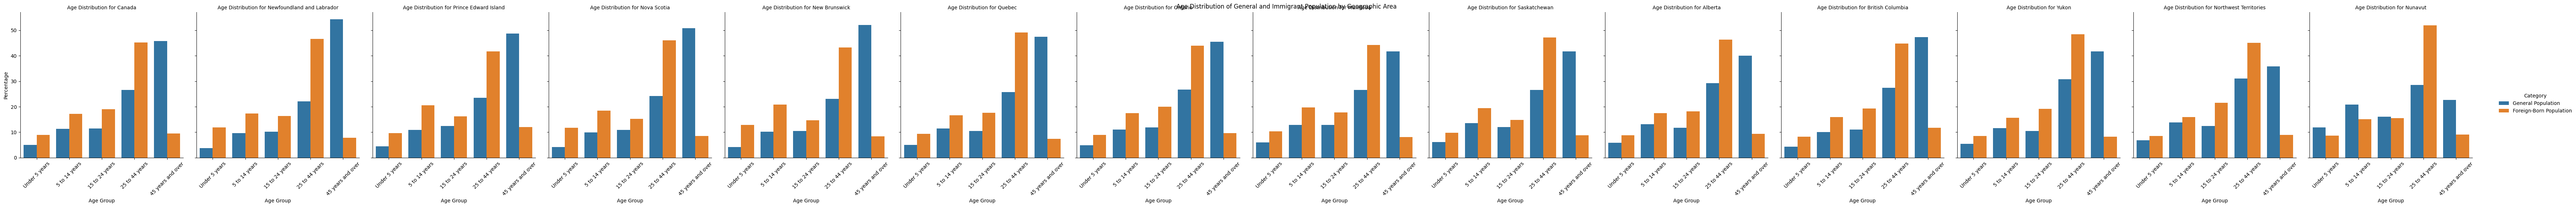

In [ ]:
fig6 = sns.catplot(Age, x='Age Group', y='Percentage', hue='Category', col='Geographic Area', kind='bar')
fig6.fig.suptitle("Age Distribution of General and Immigrant Population by Geographic Area")
fig6.set_axis_labels("Age Group", "Percentage")
fig6.set_titles("Age Distribution for {col_name}")
for axes in fig6.axes.flat:
    axes.tick_params(axis='x', labelrotation=45)
plt.show()

## **SCATTER PLOT VISUALIZATIONS-CENSUS METROPOLITAN AREAS**

###**Non-Permanent Residents by CMA**

In [ ]:
NPR_CMA.head()

,CMA,REGION,POP (2021),NON-PERMANENT RESIDENTS,PER CAPITA
0,Toronto,Ontario,6202225,249980,4030.489058
1,Montreal,Quebec,4291732,161680,3767.243621
2,Vancouver,British Columbia,2642825,133275,5042.899170
3,Ottawa,Ontario,1135014,29800,2625.518276
4,Calgary,Prairies,1481806,27865,1880.475582


In [ ]:
NPR_CMA.tail()

,CMA,REGION,POP (2021),NON-PERMANENT RESIDENTS,PER CAPITA
21,St. John's,Atlantic,212579,4375,2058.058416
22,Abbotsford–Mission,British Columbia,195726,5840,2983.763016
23,Kingston,Ontario,172546,3320,1924.124581
24,Greater Sudbury,Ontario,170605,3560,2086.691480
25,Gatineau,Quebec,353293,5360,1517.154317


In [ ]:
fig7=px.scatter(NPR_CMA, x="POP (2021)", y="PER CAPITA",
                color="REGION", trendline="ols")
fig7.update_layout(
    title="CMA Population vs. Non-Permanent Residents Per 100,000")
fig7.show()

###**2016-21 Growth Rate, CMA vs. Immigration**

In [ ]:
GrowthCMA.head()

,CMA,REGION,POP (2021),% Change from 2016,Foreign-Born Population (2021),Foreign-Born Population (2016),% Change from 2016 (Foreign-Born)
0,Toronto,Ontario,6202225,4.6,2862850,2705550,5.813975
1,Montreal,Quebec,4291732,4.6,1022940,936305,9.252861
2,Vancouver,British Columbia,2642825,7.3,1089185,989540,10.069830
3,Ottawa,Ontario,1135014,9.2,267060,219705,21.553902
4,Calgary,Prairies,1481806,6.4,460875,404700,13.880652


In [ ]:
GrowthCMA.tail()

,CMA,REGION,POP (2021),% Change from 2016,Foreign-Born Population (2021),Foreign-Born Population (2016),% Change from 2016 (Foreign-Born)
21,St. John's,Atlantic,212579,2.0,9505,8135,16.840811
22,Abbotsford–Mission,British Columbia,195726,8.4,50085,43775,14.414620
23,Kingston,Ontario,172546,7.1,20295,18400,10.298913
24,Greater Sudbury,Ontario,170605,2.8,9985,9360,6.677350
25,Gatineau,Quebec,353293,6.3,46785,36095,29.616290


In [ ]:
fig8=px.scatter(GrowthCMA, x="% Change from 2016", y="% Change from 2016 (Foreign-Born)",
                color="REGION", trendline="ols")
fig8.update_layout(
    title="Growth Rates of CMAs vs. CMAs' Foreign-Born Population")
fig8.show()

### **Per-Capita Recent Immigration, Continents of Origin**

In [ ]:
RecImm_CMA.head()

,CMA,REGION,POPULATION (2021),RECENT IMMIGRANTS-TOTAL,RECENT IMMIGRANTS-CONTINENT OF ORIGIN,RECENT IMMIGRANTS PER-CAPITA
0,Toronto,Ontario,6202225,41605,Americas,670.807654
1,Montreal,Quebec,4291732,25125,Americas,585.427981
2,Vancouver,British Columbia,2642825,16725,Americas,632.845535
3,Ottawa,Ontario,1135014,5260,Americas,463.430407
4,Calgary,Prairies,1481806,8310,Americas,560.802156


In [ ]:
RecImm_CMA.tail()

,CMA,REGION,POPULATION (2021),RECENT IMMIGRANTS-TOTAL,RECENT IMMIGRANTS-CONTINENT OF ORIGIN,RECENT IMMIGRANTS PER-CAPITA
125,St. John's,Atlantic,212579,10,Australia & Others,4.704134
126,Abbotsford–Mission,British Columbia,195726,85,Australia & Others,43.428058
127,Kingston,Ontario,172546,15,Australia & Others,8.693334
128,Greater Sudbury,Ontario,170605,25,Australia & Others,14.653732
129,Gatineau,Quebec,353293,35,Australia & Others,9.906791


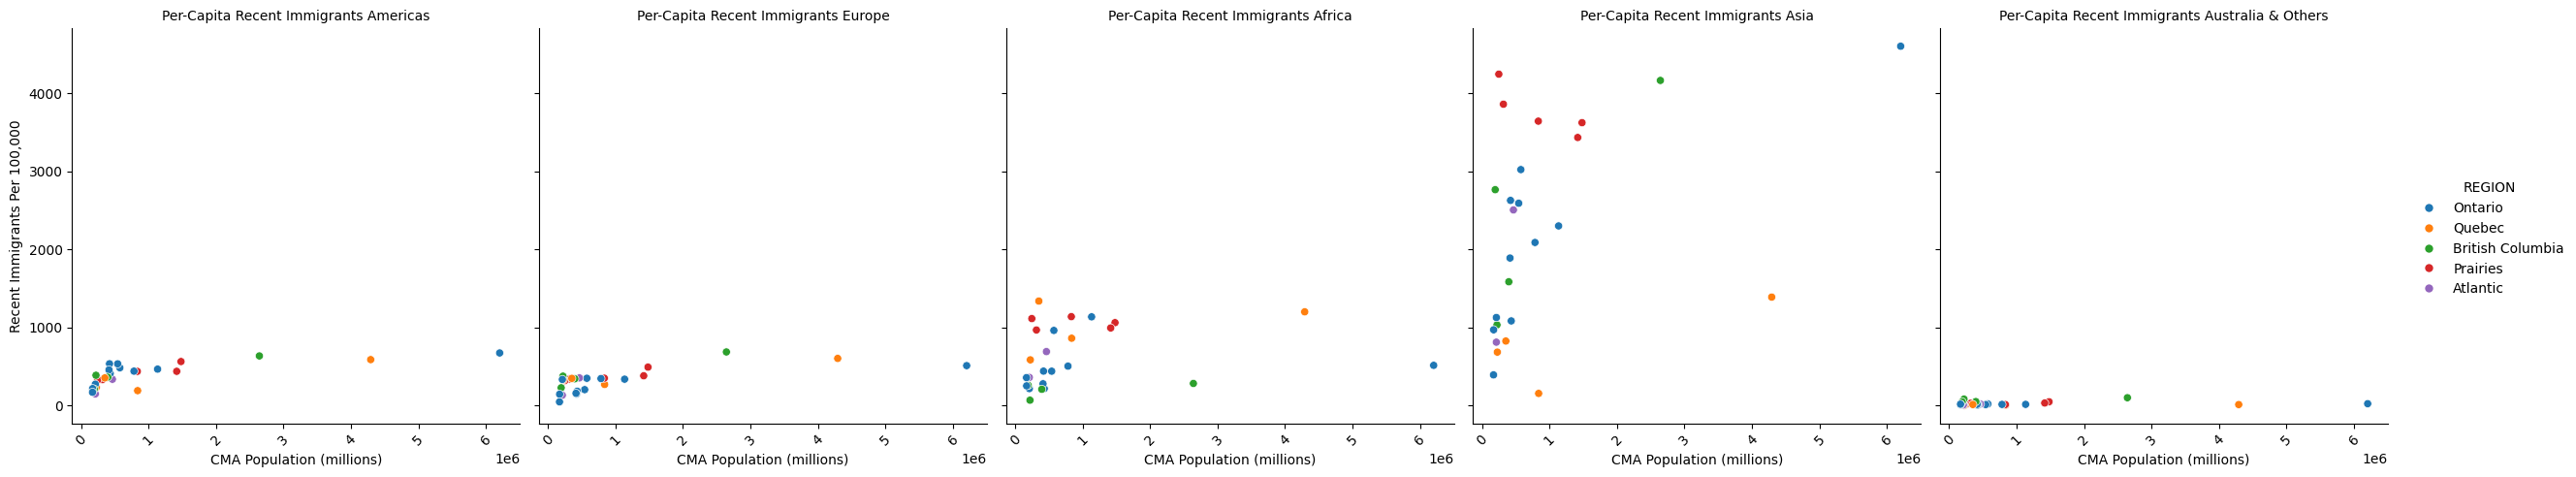

In [ ]:
fig9 = sns.relplot(RecImm_CMA, x='POPULATION (2021)', y='RECENT IMMIGRANTS PER-CAPITA', hue='REGION',
                   col='RECENT IMMIGRANTS-CONTINENT OF ORIGIN', kind='scatter')

fig9.set_axis_labels("CMA Population (millions)", "Recent Immigrants Per 100,000")
fig9.set_titles("Per-Capita Recent Immigrants {col_name}")
for axes in fig9.axes.flat:
    axes.tick_params(axis='x', labelrotation=45)
plt.show()

## **MAP VISUALIZATIONS**

### **Non-Permanent Residents Growth Rate**

In [ ]:
# The growth of NPRs accelerated starting at the end ot 2022
# Let's map out its growth starting from Q3 2022 (July 2022)
NPR22_24 = NPR_ProvTerr[(NPR_ProvTerr['QUARTER'] == 'Q3 2024') | (NPR_ProvTerr['QUARTER'] == 'Q3 2022')]
NPR22_24 = NPR22_24.drop(['QUARTER'], axis=1)
NPR22_24


,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
86,1514248,9341,7979,30551,18204,301498,706989,39467,21561,90950,286295,985,355,73
94,3002090,17843,11323,55825,36591,588263,1377531,84614,43481,253541,529960,1935,945,238


In [ ]:
# Growth rate = [# of NPRs in Q3 2024 - # of NPRs in Q3 2022]/[# of NPRs in Q3 2022] multiplied by 100
NPR_Growth2=((NPR22_24.iloc[1]-NPR22_24.iloc[0])/NPR22_24.iloc[0])*100
NPR_Growth1=['Canada', 'Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario',
'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories', 'Nunavut']

In [ ]:
# The name "PRENAME" was selected to match with the geographic column name of the shapefile
# that will be shown in a later step
NPR_Growth=pd.DataFrame({'PRENAME': NPR_Growth1, 'Growth Rate': NPR_Growth2})
NPR_Growth.drop(NPR_Growth.index[0], inplace=True)
NPR_Growth

,PRENAME,Growth Rate
Newfoundland and Labrador,Newfoundland and Labrador,91.018092
Prince Edward Island,Prince Edward Island,41.910014
Nova Scotia,Nova Scotia,82.727243
New Brunswick,New Brunswick,101.005274
Quebec,Quebec,95.113400
Ontario,Ontario,94.844757
Manitoba,Manitoba,114.391770
Saskatchewan,Saskatchewan,101.665043
Alberta,Alberta,178.769654
British Columbia,British Columbia,85.109764


In [ ]:
uploaded = files.upload()

Saving lpr_000b21a_e.zip to lpr_000b21a_e.zip


In [ ]:
# Upload zip file associated with shapefile corresponding to 2021 Census boundaries
# Then extract all files to retrieve shapefile
zf = zipfile.ZipFile(io.BytesIO(uploaded['lpr_000b21a_e.zip']), "r")
zf.extractall()

In [ ]:
Canada = gpd.read_file("lpr_000b21a_e.shp")

In [ ]:
# To check the column name corresponding to the names of the provinces and territories
# It is indeed "PRENAME"
Canada.head()

In [ ]:
# Perform a join on the shapefile and NPR dataset
# The column the join is being performed on (i.e., PRENAME") must have the EXACT SAME ORDER
# in both the shapefile and dataset
CanMap = Canada.merge(NPR_Growth, on="PRENAME")


In [ ]:
CanMap.head()

Buffered data was truncated after reaching the output size limit.

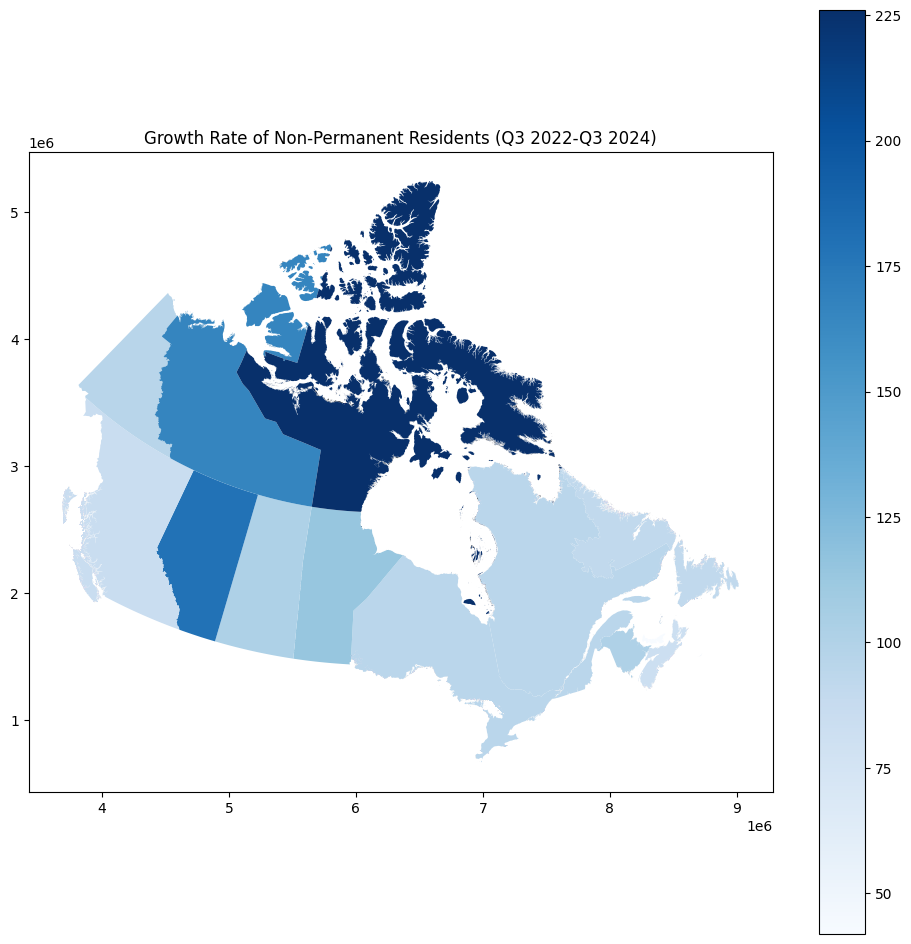

In [ ]:
CanMap.plot(column="Growth Rate", cmap="Blues", legend=True,
          figsize=(12, 12))
plt.title("Growth Rate of Non-Permanent Residents (Q3 2022-Q3 2024)")
plt.show()